In [26]:
import sys
import os
sys.path.append(os.path.abspath("../"))

import pandas as pd
import ast
import plot_automations as plotter

In [27]:
df = pd.read_csv('omniart-paintings-filtered.csv')

In [28]:
df.tail()

,artwork_name,artist_full_name,creation_year,century,school,color_pallete,dominant_color,palette_count
264242,truth,circlekeeper,2008.0,21.0,modern,"[u'#a86f61', u'#a09d79', u'#372b2e', u'#252125...",#252125,"[1312, 5526, 9605, 9971, 4030, 5524, 5562, 286..."
264243,yavanna queen of the earth giver of fruits-tif...,tiffany-illustration,2017.0,21.0,modern,"[u'#ffffff', u'#feffff', u'#eef1df', u'#c0af95...",#ffffff,"[15056, 255, 5087, 6846, 9838, 1577, 4027, 476..."
264244,unknown,kano furunobu,1700.0,18.0,japanese,"[u'#b6ad97', u'#af9974', u'#a78d66', u'#a19371...",#7e4e48,"[3431, 5740, 4247, 4971, 6362, 6885, 5328, 445..."
264245,unknown,wang yuanqi,1715.0,18.0,chinese,"[u'#f8f3ed', u'#f4ede6', u'#f1e3d0', u'#edd9bb...",#e7d2b5,"[6512, 6102, 860, 6846, 4826, 5036, 5117, 3297..."
264246,portrait of a gentleman,louis-gabriel blanchet,1725.0,18.0,"France métropolitaine, France","[u'#a9977f', u'#39211a', u'#2d2b25', u'#251f1a...",#393227,"[3673, 4253, 5392, 6641, 3191, 7046, 4680, 706..."


**1. Standardize school names**

In [29]:
mapping_df = pd.read_csv('nationality-country_dict.csv')

In [30]:
nat_to_country = dict(zip(mapping_df['nationality'], mapping_df['country']))

In [31]:
df['school'] = df['school'].map(nat_to_country).fillna(df['school'])

**2. Generate decade column**

In [32]:
df["decade"] = (df["creation_year"] // 10 * 10).astype(int)

**3. Separate only top 10 colors**

In [33]:
def fix_palette(palette):
    palette = ast.literal_eval(palette)
    if len(palette) > 10: return palette[:10]
    elif len(palette) == 10: return palette
    else: return None

In [34]:
df['color_pallete'] = df['color_pallete'].apply(fix_palette)

In [35]:
df['palette_count'] = df['palette_count'].apply(fix_palette)

In [36]:
df = df.dropna(subset=['color_pallete']).reset_index(drop=True)
df = df.dropna(subset=['palette_count']).reset_index(drop=True)

In [37]:
df.tail()

,artwork_name,artist_full_name,creation_year,century,school,color_pallete,dominant_color,palette_count,decade
264213,truth,circlekeeper,2008.0,21.0,modern,"[#a86f61, #a09d79, #372b2e, #252125, #242d42, ...",#252125,"[1312, 5526, 9605, 9971, 4030, 5524, 5562, 286...",2000
264214,yavanna queen of the earth giver of fruits-tif...,tiffany-illustration,2017.0,21.0,modern,"[#ffffff, #feffff, #eef1df, #c0af95, #896962, ...",#ffffff,"[15056, 255, 5087, 6846, 9838, 1577, 4027, 476...",2010
264215,unknown,kano furunobu,1700.0,18.0,Japan,"[#b6ad97, #af9974, #a78d66, #a19371, #a08d67, ...",#7e4e48,"[3431, 5740, 4247, 4971, 6362, 6885, 5328, 445...",1700
264216,unknown,wang yuanqi,1715.0,18.0,China,"[#f8f3ed, #f4ede6, #f1e3d0, #edd9bb, #fbf8f2, ...",#e7d2b5,"[6512, 6102, 860, 6846, 4826, 5036, 5117, 3297...",1710
264217,portrait of a gentleman,louis-gabriel blanchet,1725.0,18.0,France,"[#a9977f, #39211a, #2d2b25, #251f1a, #1c1d1d, ...",#393227,"[3673, 4253, 5392, 6641, 3191, 7046, 4680, 706...",1720


In [38]:
#df.to_csv('omniart-paintings-filtered-clean.csv', index=False)

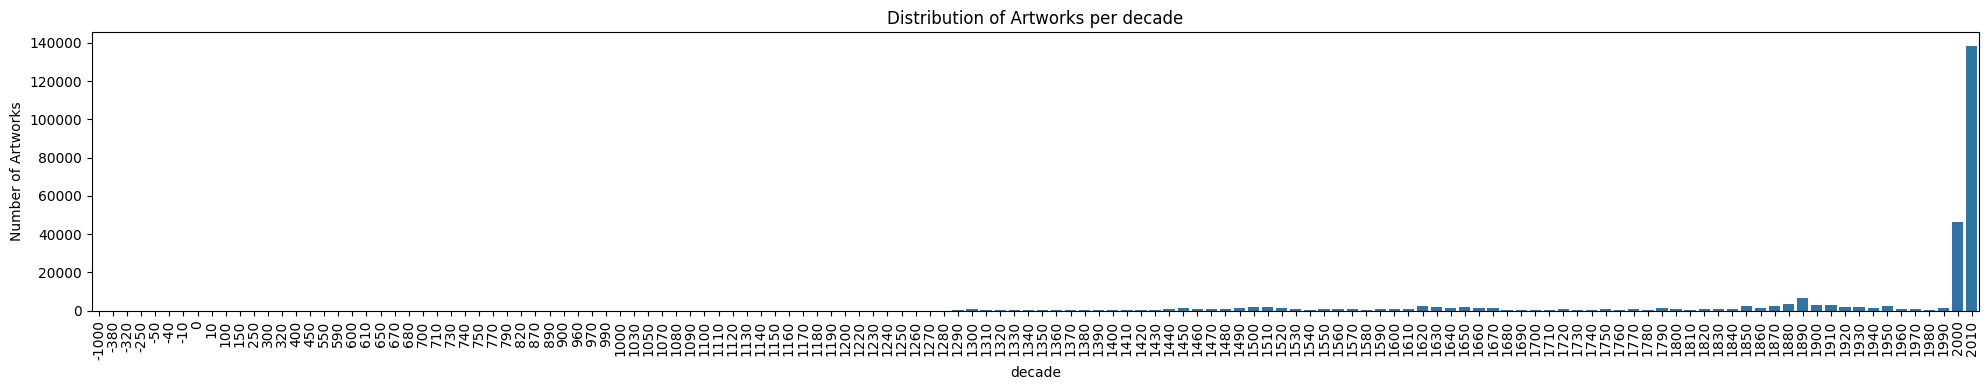

In [39]:
plotter.plot_artwork_distribution(df, target_dim="decade")

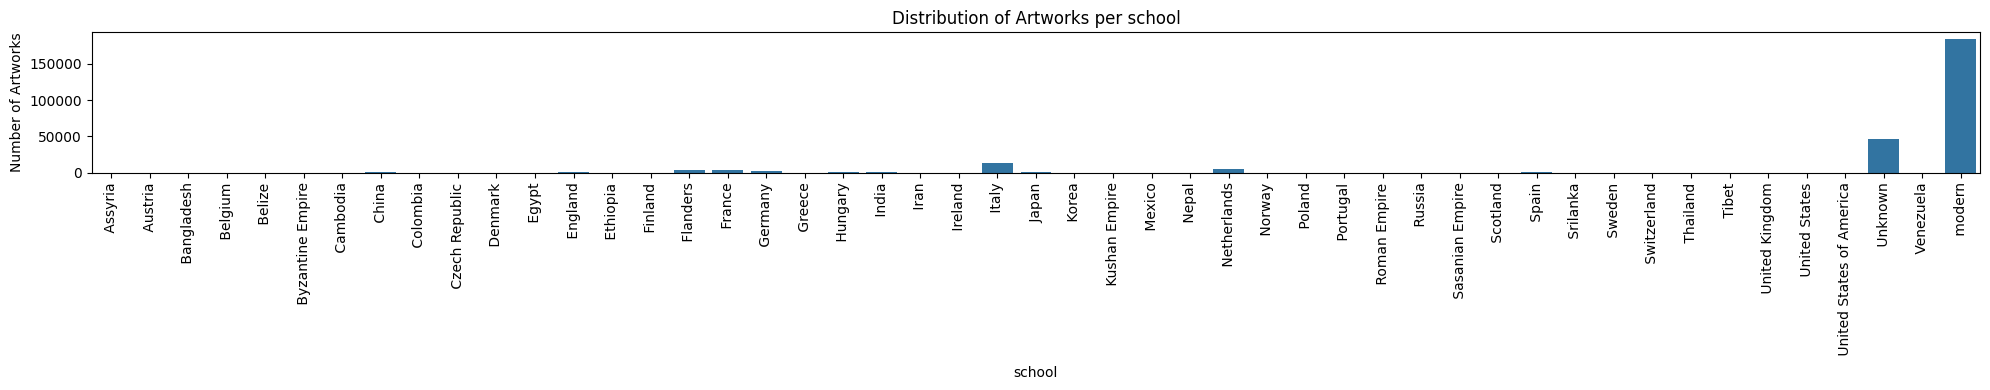

In [40]:
plotter.plot_artwork_distribution(df, target_dim="school")